In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import tifffile as tiff
import pandas as pd


nrastm = np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\NRAS\\nras_stitched\\NaN_ovldrmd_ccv_nras_both_refit_average_correct_binnedmeanmap.tif"))
nhigh = nrastm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask3_NRAS_fvalue_mask.tif"))
nmed = nrastm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask2_NRAS_fvalue_mask.tif"))
nlow = nrastm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask1_NRAS_fvalue_mask.tif"))

p2tm = np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\PDGFB2\\pdgfb2_stitched\\NaN_ovldrmd_ccv_pdgfb_take2_average_correct_binnedmeanmap_crop.tif"))
p2high = p2tm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask3_pdgfb2_fvalue_mask.tif"))
p2med = p2tm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask2_pdgfb2_fvalue_mask.tif"))
p2low = p2tm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask1_pdgfb2_fvalue_mask.tif"))

p3tm = np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\PDGFB3\\pdgfb3_stitched\\NaN_ovldrmd_ccv_pdgfb3_restitch_average_binnedmeanmap.tif"))
p3high = p3tm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask3_pdgfb3_fvalue_mask.tif"))
p3med = p3tm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask2_pdgfb3_fvalue_mask.tif"))
p3low = p3tm*np.array(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask1_pdgfb3_fvalue_mask.tif"))


#plt.imshow(p3med)
#plt.clim([0,2000])
#plt.colorbar()

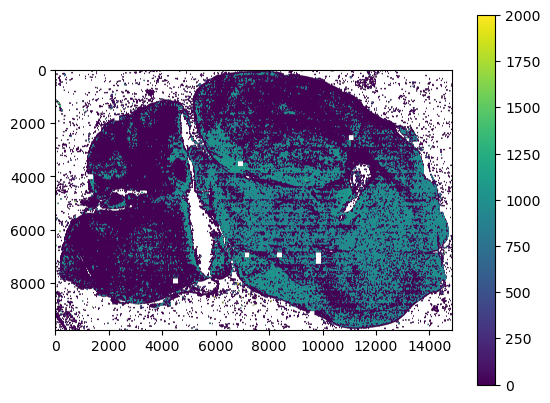

In [6]:
plt.imshow(p3high)
plt.clim([0,2000])
plt.colorbar()

In [22]:
nhigh[0,0]

np.float64(0.0)

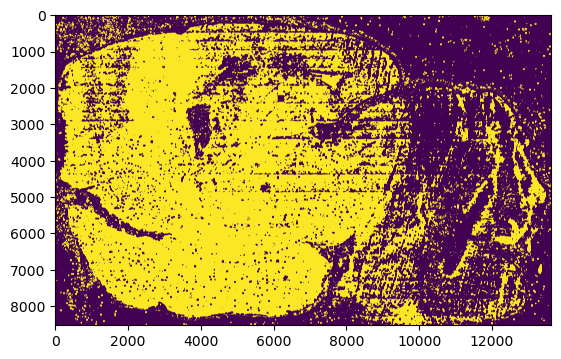

In [23]:
plt.imshow(tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask3_NRAS_fvalue_mask.tif"))

In [25]:
nras_total_mask = tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask3_NRAS_fvalue_mask.tif")+tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask2_NRAS_fvalue_mask.tif")+tiff.imread("G:\\MNtissueproject_CLEANED20250716\\figures\\figure 5\\mask1_NRAS_fvalue_mask.tif")

In [26]:
np.bincount(nras_total_mask.ravel())

array([  5768018, 110391933,        16])

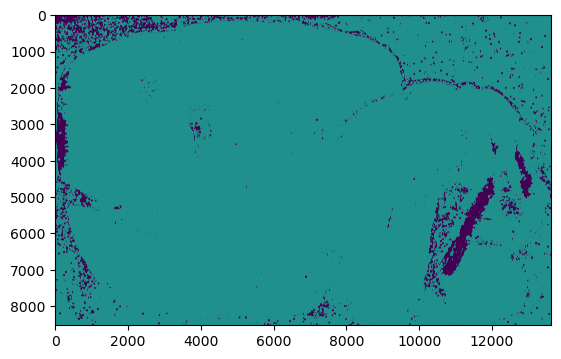

In [ ]:
plt.imshow()

C:\Users\hwilson23\AppData\Local\Temp\ipykernel_46180\2646102883.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[2].boxplot(
C:\Users\hwilson23\AppData\Local\Temp\ipykernel_46180\2646102883.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot(
C:\Users\hwilson23\AppData\Local\Temp\ipykernel_46180\2646102883.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot(


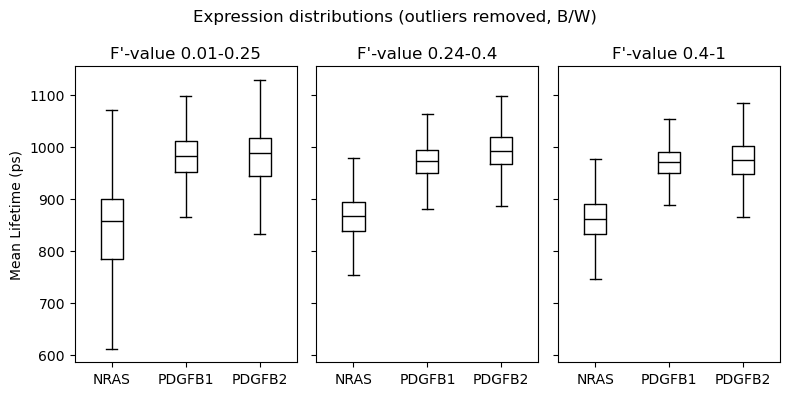

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# --- Helper function ---
def extract_values(masked_array):
    return masked_array[masked_array > 0]  # change to ~np.isnan(...) if background is NaN

# Collect values
nras_high, nras_med, nras_low = map(extract_values, [nhigh, nmed, nlow])
p2_high, p2_med, p2_low       = map(extract_values, [p2high, p2med, p2low])
p3_high, p3_med, p3_low       = map(extract_values, [p3high, p3med, p3low])

# Organize into groups
high_values = [nras_high, p2_high, p3_high]
med_values  = [nras_med,  p2_med,  p3_med]
low_values  = [nras_low,  p2_low,  p3_low]

# --- Plot ---
fig, axs = plt.subplots(1, 3, figsize=(8, 4), sharey=True)

# Common kwargs for black-and-white boxplots
boxprops = dict(color="black")
whiskerprops = dict(color="black")
capprops = dict(color="black")
medianprops = dict(color="black")

# High
axs[2].boxplot(
    high_values, labels=["NRAS", "PDGFB1", "PDGFB2"],
    showfliers=False,
    boxprops=boxprops, whiskerprops=whiskerprops,
    capprops=capprops, medianprops=medianprops
)
axs[2].set_title("F'-value 0.4-1")

# Medium
axs[1].boxplot(
    med_values, labels=["NRAS", "PDGFB1", "PDGFB2"],
    showfliers=False,
    boxprops=boxprops, whiskerprops=whiskerprops,
    capprops=capprops, medianprops=medianprops
)
axs[1].set_title("F'-value 0.25-0.4")

# Low
axs[0].boxplot(
    low_values, labels=["NRAS", "PDGFB1", "PDGFB2"],
    showfliers=False,
    boxprops=boxprops, whiskerprops=whiskerprops,
    capprops=capprops, medianprops=medianprops
)
axs[0].set_title("F'-value 0.01-0.25")
axs[0].set_ylabel('Mean Lifetime (ps)')

plt.suptitle("Expression distributions (outliers removed, B/W)")
plt.tight_layout()
plt.show()
